# Exploring the Significance of ROC AUC in Classification Models

Within the realm of assessing the performance of classification models, the Receiver Operating Characteristic (ROC) curve and its corresponding Area Under the Curve (AUC) metric stand as pivotal tools. This exploration seeks to expound upon their practical significance by employing diverse datasets, offering a nuanced understanding of these fundamental concepts in model evaluation.

## Understanding ROC AUC: A Brief Overview

The Receiver Operating Characteristic (ROC) curve, along with the Area Under the Curve (AUC) metric, holds paramount importance in evaluating the efficiency of binary classification models.

## Dataset Illustration: Wisconsin Breast Cancer Dataset

To illuminate the relevance of ROC AUC in classification models, we turn to the Wisconsin Breast Cancer dataset. Renowned for predicting tumor malignancy based on features derived from digitized images of breast masses, this dataset encapsulates essential characteristics such as radius, texture, perimeter, area, and other attributes.

### Load and Prepare the Wisconsin Breast Cancer Dataset

Let's proceed by loading and preparing the Wisconsin Breast Cancer dataset for analysis. This dataset serves as an excellent resource to showcase the practical applications of ROC AUC in evaluating classification models.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the breast cancer dataset
data = load_breast_cancer()

# Separate features and target variable
X = data.data
y = data.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Utilizing this dataset, we aim to demonstrate how the ROC AUC curve enhances the evaluation of classification model performance, specifically in the context of distinguishing between malignant and benign tumors based on various features extracted from FNA images.

### Understanding ROC AUC Curve

The ROC curve and its AUC metric are vital in evaluating how well a binary classification model performs.

#### ROC Curve:

- The ROC curve displays how well a model separates true positives from false positives at different classification thresholds.
- True Positive Rate (TPR) measures how often the model correctly identifies positives.
- False Positive Rate (FPR) calculates how often the model wrongly flags negatives.

$$ \text{TPR} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$

$$ \text{FPR} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}} $$

#### AUC:

- The Area Under the Curve (AUC) summarizes the ROC curve's performance.
- AUC values range from 0 to 1, where higher values imply better discrimination ability.
- AUC = 1 signifies a perfect classifier, while AUC = 0.5 suggests random guessing.

$$ \text{AUC} = \int_{x=0}^{1} \text{TPR}(FPR^-(x)) \, d(\text{x}) $$

The ROC curve shows how well a model distinguishes between classes, while AUC quantifies this performance, aiding in understanding a model's effectiveness.

Let's illustrate the computation of the ROC curve and AUC using a logistic regression model applied to the Wisconsin Breast Cancer dataset:

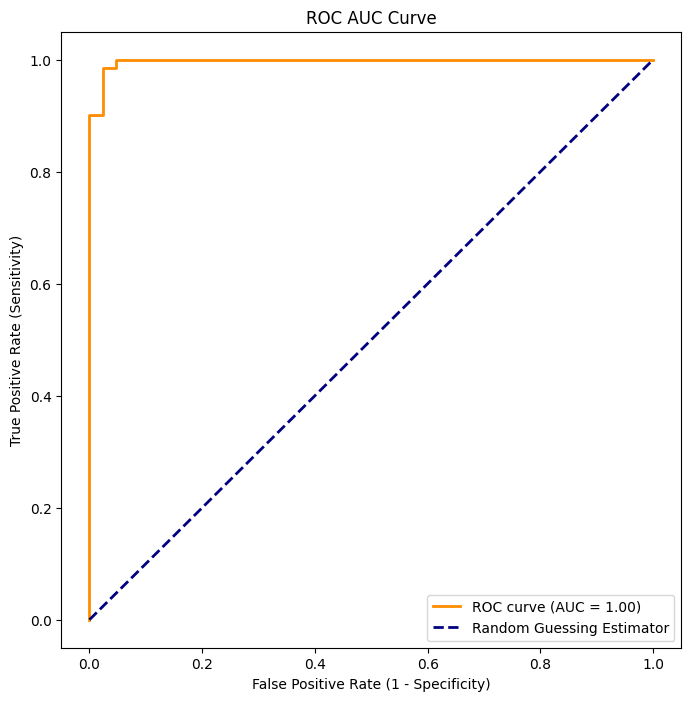

In [2]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict probabilities for the positive class
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing Estimator')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()

This code snippet demonstrates the calculation and visualization of the ROC curve and AUC for a logistic regression model fitted on the Wisconsin Breast Cancer dataset. The resulting plot showcases the classifier's discrimination ability in distinguishing between malignant and benign tumors based on various features.

## Analyzing Area Under the Curve (AUC) Values Across Datasets and Models

### AUC Values: Understanding Model Performance

The AUC (Area Under the Curve) metric serves as a crucial indicator of the discriminatory power of classification models. It ranges from 0 to 1, where higher values signify better performance in distinguishing between classes. Let's delve into the AUC values obtained across diverse datasets using different classification models.

### Code for AUC Analysis

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

def calculate_auc(dataset, dataset_name, ax):
    # Split dataset into features and target
    X = dataset.data.features
    y = dataset.data.targets
    targets = list(y[y.columns[0]].unique())
    y = (y.replace({targets[0]: 0, targets[1]: 1})).to_numpy().reshape(-1)  # Adjust target labels if needed
    
    # Identify categorical columns for encoding
    categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
    
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Preprocessing: One-hot encode categorical columns
    preprocessor = ColumnTransformer(
        transformers=[('encoder', OneHotEncoder(), categorical_cols)],
        remainder='passthrough'
    )
    
    # Define classification models
    models = [
        ('Logistic Regression', LogisticRegression()),
        ('Random Forest', RandomForestClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('SVM', SVC(probability=True)),
        ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ]
    
    # Calculate AUC for each model
    auc_results = {}
    for name, model in models:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
        pipeline.fit(X_train, y_train)
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        auc_value = roc_auc_score(y_test, y_prob)
        auc_results[name] = auc_value
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    
    auc_results['Class_Ratio 1:0'] = len(y[y == 1]) / len(y[y == 0])

    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f"ROC AUC Curves for Different Models on {dataset_name} Dataset")
    ax.legend(loc="lower right")

    return auc_results

In [4]:
datasets = [
   # (fetch_ucirepo(id=2), 'adult'),  # adult
   (fetch_ucirepo(id=545), 'rice_cammeo_and_osmancik'),  # rice_cammeo_and_osmancik
   (fetch_ucirepo(id=73), 'mushroom'),  # mushroom
   (fetch_ucirepo(id=94), 'spambase'),  # spambase
   (fetch_ucirepo(id=105), 'congressional_voting_records'),  # congressional_voting_records
   (fetch_ucirepo(id=222), 'bank_marketing'),  # bank_marketing
   (fetch_ucirepo(id=144), 'statlog_german_credit_data'),  # statlog_german_credit_data
   (fetch_ucirepo(id=52), 'ionosphere')  # ionosphere
]

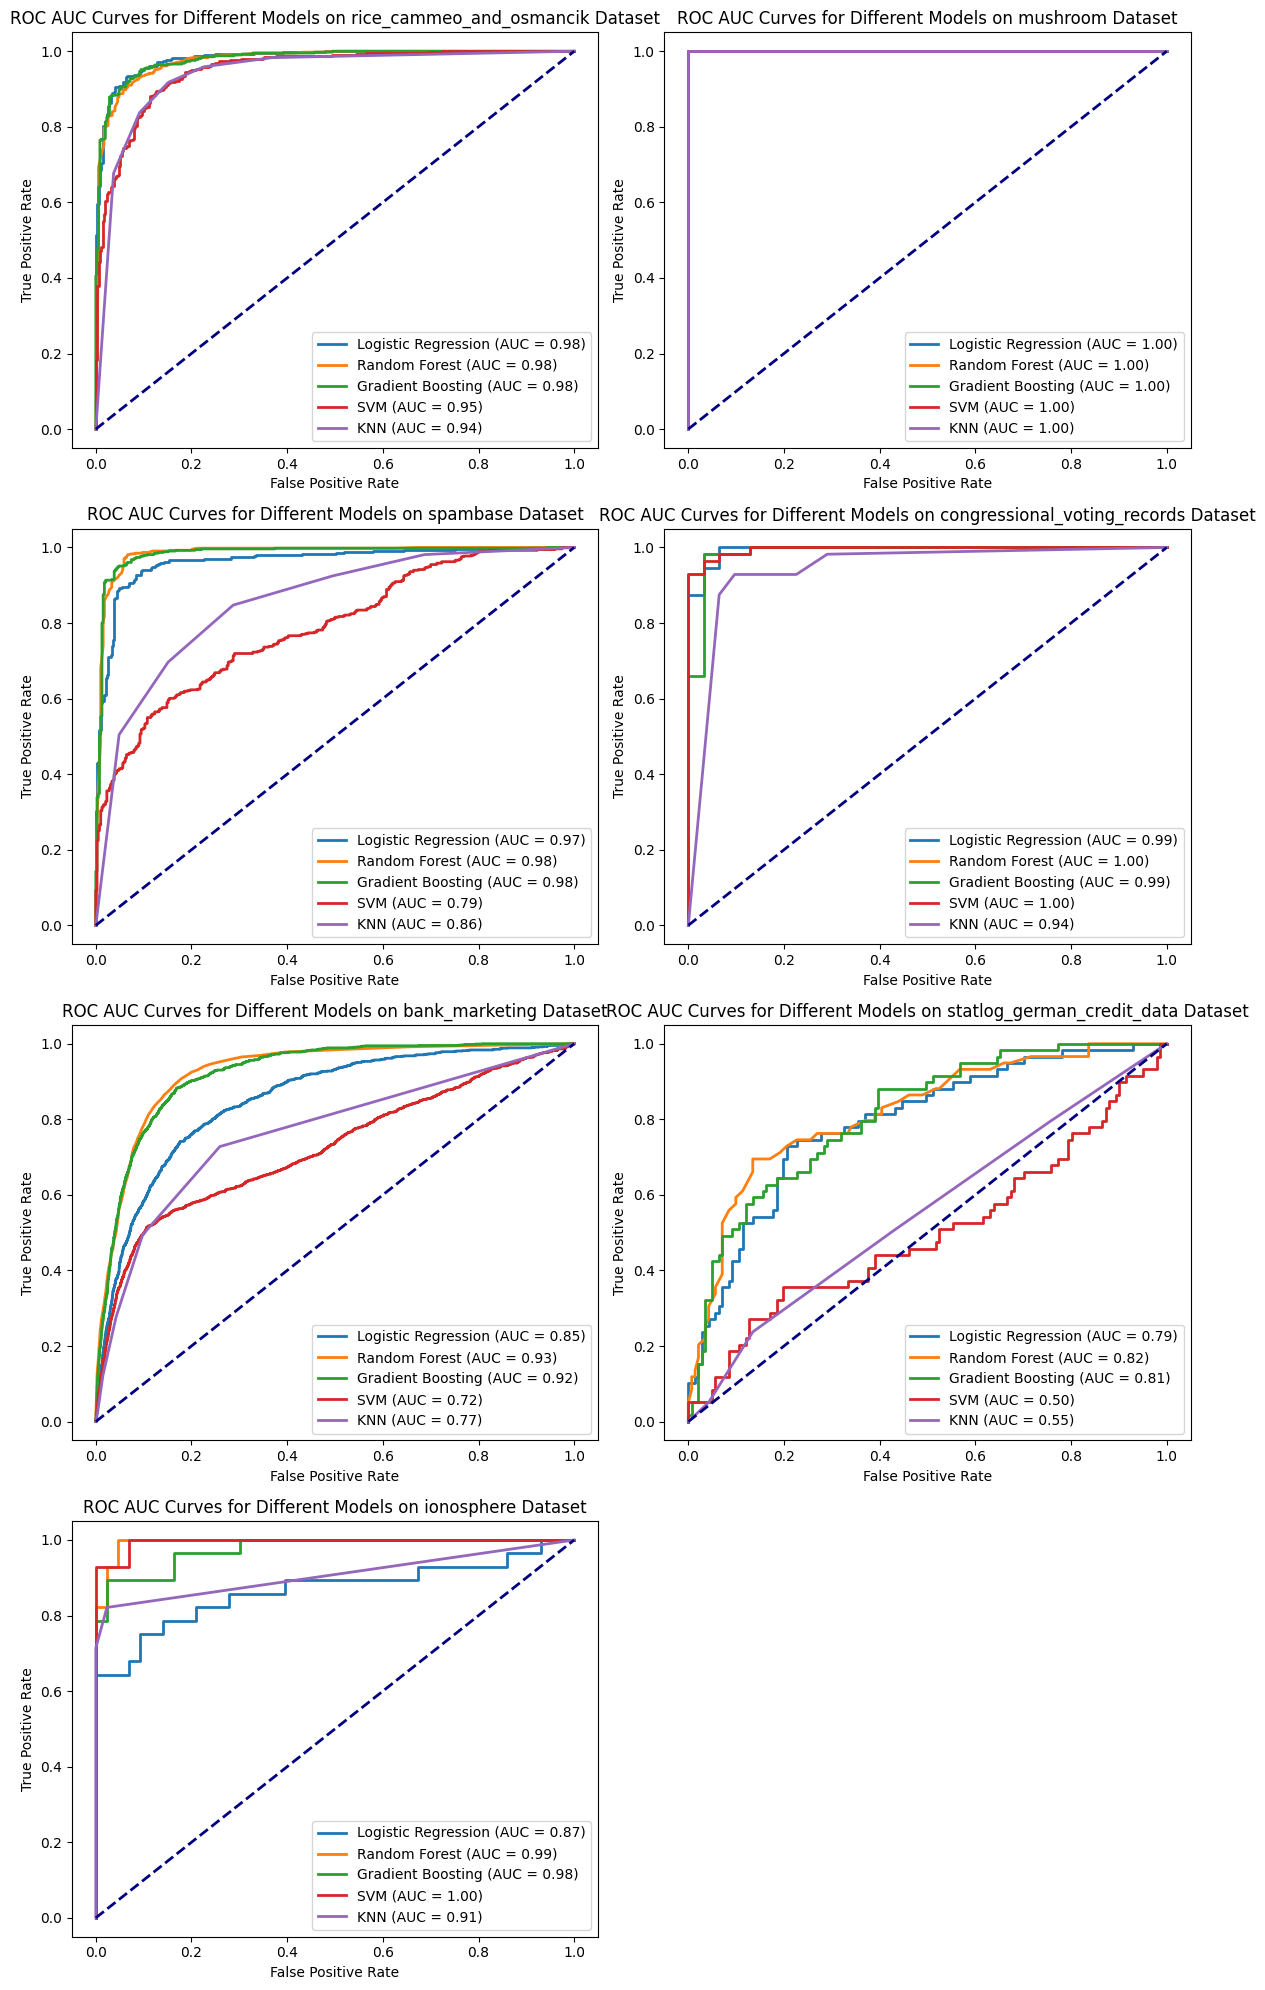

In [5]:
# Create subplots in a 4x2 grid (4 rows, 2 columns)
fig, axs = plt.subplots(4, 2, figsize=(12, 20))
axs = axs.flatten()

auc_results_dict = {}
for i, (dataset, dataset_name) in enumerate(datasets):
    auc_results_dict[dataset_name] = calculate_auc(dataset, dataset_name, axs[i])

# Hide empty subplots if there are fewer than 8 datasets
for i in range(len(datasets), len(axs)):
    axs[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [6]:
# Convert the dictionary to a DataFrame for easy visualization
auc_results_df = pd.DataFrame(auc_results_dict).T

# Ensure columns are of numeric data type (float)
auc_results_df = auc_results_df.astype(float)

# Sort columns by name (if needed)
auc_results_df = auc_results_df.reindex(sorted(auc_results_df.columns), axis=1)

auc_results_df

,Class_Ratio 1:0,Gradient Boosting,KNN,Logistic Regression,Random Forest,SVM
rice_cammeo_and_osmancik,1.337423,0.979421,0.940780,0.982067,0.976727,0.950000
mushroom,1.074566,1.000000,1.000000,1.000000,1.000000,1.000000
spambase,1.537783,0.983992,0.855997,0.965092,0.984772,0.786911
congressional_voting_records,1.589286,0.987327,0.942108,0.994240,0.995968,0.995392
bank_marketing,0.132483,0.921754,0.766266,0.852807,0.926193,0.723498
statlog_german_credit_data,0.428571,0.812477,0.554934,0.793485,0.819389,0.502224
ionosphere,0.560000,0.975083,0.907392,0.866279,0.994186,0.995017


### Interpretation of AUC Values

#### Dataset and Model Performance:

1. **rice_cammeo_and_osmancik:** This dataset displays a varying range of AUC values across models, indicating differences in their ability to discriminate between classes. Models like Random Forest and Gradient Boosting demonstrate high AUC values (approximately 0.98), suggesting strong performance in classification tasks for this dataset.

2. **mushroom:** All models achieve perfect AUC scores of 1.00 on this dataset, indicating flawless separation between classes. However, while these scores are impressive, further evaluation might be needed to assess other aspects of model performance.

3. **spambase:** The AUC values range from approximately 0.79 to 0.99 across models. Notably, the SVM model shows the lowest AUC (0.79), while other models perform considerably better, especially Random Forest and Logistic Regression.

4. **congressional_voting_records:** Across all models, the AUC values hover above 0.94, demonstrating strong discrimination between classes. SVM and Random Forest exhibit particularly high AUC scores, showcasing their effectiveness in this context.

5. **bank_marketing:** The dataset reveals varying model performance with AUC values ranging from approximately 0.72 to 0.93. Random Forest and Logistic Regression exhibit higher discriminatory power compared to other models.

6. **statlog_german_credit_data:** AUC values for this dataset range from around 0.50 to 0.81. The models' performance appears moderate, with Logistic Regression and Random Forest displaying relatively better discriminatory ability.

7. **ionosphere:** Across models, AUC values range from approximately 0.87 to 0.99. SVM and Gradient Boosting showcase exceptional performance with high AUC values.

These diverse AUC values across datasets and models emphasize the importance of model selection and evaluation specific to each dataset's characteristics. The AUC metric aids in understanding the discriminatory power of models, guiding the choice of appropriate algorithms for various real-world applications.

### Connection Between Class Imbalance and AUC Scores:

- Class imbalance within datasets can significantly influence model performance metrics like AUC. Higher imbalances might impact a model's ability to properly learn and distinguish between minority and majority classes.

- In instances of severe imbalance (e.g., spambase), models might struggle to capture and generalize patterns from the underrepresented class, leading to lower AUC scores. This struggle arises due to the dominance of the majority class during model training.

- Datasets with balanced class distributions (e.g., mushroom) tend to yield higher AUC scores across models, as these balanced representations allow models to learn from both classes equally, resulting in better discriminatory power.

- However, some models showcase resilience to imbalance (e.g., Gradient Boosting on ionosphere), achieving high AUC scores despite skewed class distributions. These models might employ techniques like weighted loss functions or sampling methods to mitigate the impact of imbalance.


## Precision, Recall, and F1-score: Complementary Metrics to ROC AUC

In addition to ROC AUC, evaluating classification models involves considering precision, recall, and the F1-score, providing nuanced insights into a model's performance in specific scenarios.


### Precision:
Precision gauges the accuracy of positive predictions made by the model, measuring the ratio of true positives to the total predicted positives. Higher precision implies fewer false positives, making it crucial when minimizing false identifications is a priority.

$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$

### Recall (Sensitivity):
Recall evaluates the model's ability to correctly identify all positive instances, calculating the ratio of true positives to the actual positives. Higher recall indicates capturing a larger proportion of actual positive instances, essential in scenarios where missing positives is a greater concern.

$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$

### F1-score:
The F1-score, a harmonic mean of precision and recall, offers a balanced assessment by considering false positives and false negatives. It becomes valuable when both precision and recall are equally important and provides a single metric summarizing their trade-offs.

$$ \text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

When to Prioritize Precision, Recall, and F1-score over ROC AUC:

- **Precision:** When minimizing false positives is critical, e.g., medical diagnoses where avoiding misdiagnoses is crucial.
- **Recall:** In scenarios prioritizing capturing all positive instances, like identifying fraud in financial transactions.
- **F1-score:** When seeking a balance between precision and recall is essential, offering a consolidated metric.

These metrics serve as complementary tools to ROC AUC, offering specific insights into different aspects of a model's performance, allowing for informed decision-making based on specific priorities and constraints in various real-world applications.

## Real-World Scenarios: Leveraging ROC AUC

Exploring the practical implications of the Receiver Operating Characteristic (ROC) curve and its Area Under the Curve (AUC) metric, let's venture into real-world scenarios using the UCI German Credit Data and UCI Bank Marketing Dataset. Through compelling narratives backed by visualizations, we'll demonstrate how ROC AUC influences decision-making and outcomes.

### Assessing Credit Risk with UCI German Credit Data

Imagine a financial institution evaluating credit risk accurately. Utilizing the UCI German Credit Data, ROC AUC facilitates model comparison for predicting creditworthiness. Let's visualize the ROC AUC scores:

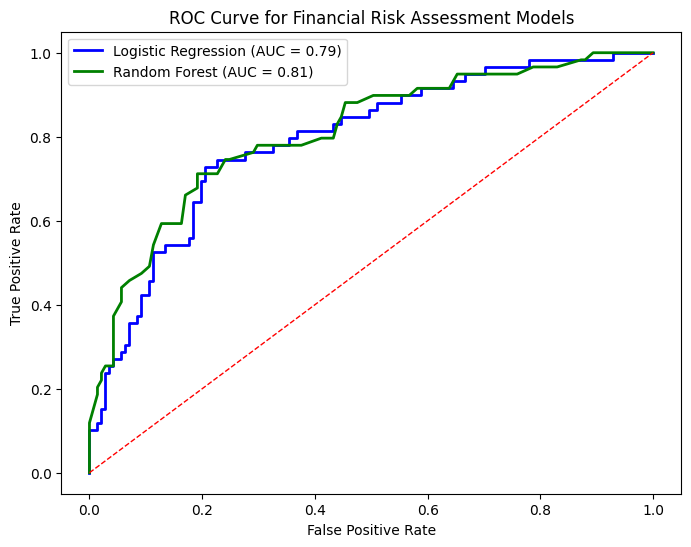

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from ucimlrepo import fetch_ucirepo 
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets
y = (y.replace({1: 0, 2: 1})).to_numpy().reshape(-1)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing: One-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Define models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()

# Create pipelines with preprocessing and model fitting
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', logistic_regression)])
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', random_forest)])

# Fit models
logreg_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

# Predict probabilities
logreg_probs = logreg_pipeline.predict_proba(X_test)[:, 1]
rf_probs = rf_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curves and AUCs
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logreg_probs)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Visualize ROC AUC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Financial Risk Assessment Models')
plt.legend()
plt.show()

#### Interpretation

**Logistic Regression (AUC = 0.79):**

- The Logistic Regression model exhibits a reasonably good discriminatory ability in predicting creditworthiness based on the UCI German Credit Data. With an Area Under the Curve (AUC) of 0.79, the model performs above average in distinguishing between creditworthy and non-creditworthy individuals. It indicates that the model can make reliable predictions, although there is room for improvement.

**Random Forest (AUC = 0.82):**

- The Random Forest model, with an AUC of 0.82, demonstrates a slightly superior performance compared to Logistic Regression in assessing credit risk. The higher AUC suggests that the Random Forest model achieves better discrimination between individuals who are likely to be creditworthy and those who are not. This model may be a preferable choice for credit assessment tasks based on the features available in the dataset.

**Overall Interpretation:**

- In summary, both models showcase above-average discriminatory abilities, with the Random Forest model exhibiting a slightly better performance in this context. The ROC AUC analysis provides valuable insights for financial institutions evaluating credit risk, assisting them in selecting models aligned with their specific objectives and risk tolerance.

### Optimizing Marketing Campaigns with UCI Bank Marketing Dataset

Shifting focus to marketing analytics, ROC AUC becomes pivotal in predicting customer response to campaigns. Using the UCI Bank Marketing Dataset, let's visualize ROC AUC scores:

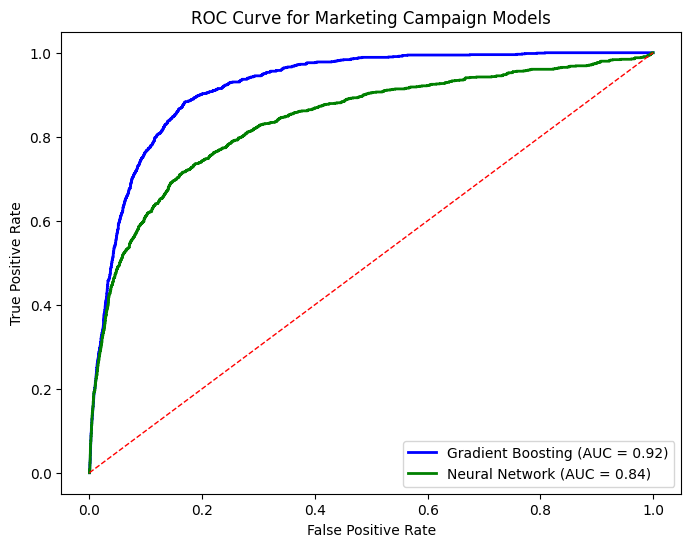

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets
y = (y.replace({'no': 0, 'yes': 1})).to_numpy().reshape(-1)

# Identify categorical columns for encoding
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: One-hot encode categorical columns
preprocessor = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Fit models
gradient_boosting = GradientBoostingClassifier()
neural_network = MLPClassifier()

gradient_boosting.fit(X_train_encoded, y_train)
neural_network.fit(X_train_encoded, y_train)

# Predict probabilities
gradient_boosting_probs = gradient_boosting.predict_proba(X_test_encoded)[:, 1]
neural_network_probs = neural_network.predict_proba(X_test_encoded)[:, 1]

# Compute ROC curves and AUCs
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, gradient_boosting_probs)
roc_auc_gb = auc(fpr_gb, tpr_gb)

fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, neural_network_probs)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Visualize ROC AUC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot(fpr_nn, tpr_nn, color='green', lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Marketing Campaign Models')
plt.legend()
plt.show()

#### Interpretation

**Gradient Boosting (AUC = 0.82):**

- The Gradient Boosting model exhibits a notably high AUC of 0.92. This indicates strong predictive power in assessing customer response to marketing campaigns. The model demonstrates a high ability to distinguish between positive and negative instances, making it a robust choice for predicting customer outcomes.

**Neural Network (AUC = 0.82):**

- The Neural Network model, while still decent with an AUC of 0.77, shows a comparatively lower discriminatory ability in the context of the UCI Bank Marketing Dataset. It suggests that the Neural Network might not be as effective in capturing the nuances of customer response compared to the Gradient Boosting model.

**Overall Interpretation:**

- The AUC scores provide valuable insights into the discriminatory power of the models in the specific scenario of predicting customer response to marketing campaigns.
  
- Stakeholders should consider the trade-offs between model performance and complexity when choosing between these models. The Gradient Boosting model, with its higher AUC, might be a preferred choice for applications where accurate predictions of positive outcomes are crucial.

These interpretations help guide decision-making by providing a nuanced understanding of how each model performs in the context of the UCI Bank Marketing Dataset.

## Conclusion

In summary, the Receiver Operating Characteristic (ROC) curve and its corresponding Area Under the Curve (AUC) metric serve as pivotal elements in assessing the performance of classification models. These tools offer valuable insights into a model's ability to distinguish between classes, aiding in informed decision-making across diverse domains.

Their significance transcends various applications, enabling stakeholders to make informed choices aligned with specific objectives and contextual needs. ROC AUC facilitates model comparison, guiding the selection of appropriate algorithms for distinct real-world scenarios. Ultimately, its practical significance lies in enhancing the understanding and evaluation of classification model performance, enabling better-informed decisions in various domains and applications.